In [4]:
import numpy as np

In [90]:
all_data = np.genfromtxt("./cleaned_adult.csv",delimiter = ",", usecols = range(0, 105), skip_header = 1, dtype = int)

size = 2
training_data = {}
test_data = {}
training_result = {}
test_result = {}

#create training sets of various sizes, with the test set being all the rest of the elements in the dataset not used in the training set.
#shuffle the data after each so that the datasets are completely independent of eachother.
while(size < int(data.shape[0]*.8)):
    np.random.shuffle(all_data)
    data = all_data[:, :104]
    result = all_data[:, 104]
    training_data_last_index = int(size * .8)
    training_data[size] = data[:training_data_last_index]
    test_data[size] = data[training_data_last_index:]
    training_result[size] = result[:training_data_last_index]
    test_result[size] = result[training_data_last_index:]
    size*=2
    

In [95]:
from sklearn.tree import DecisionTreeClassifier
training_scores = []
test_scores = []
sizes = []
size = 2
while(size < int(np.ceil(data.shape[0]*.8))):
    sizes.append(size)
    D3 = DecisionTreeClassifier(random_state=0, criterion="entropy").fit(training_data[size], training_result[size])
    training_scores.append(D3.score(training_data[size], training_result[size]))
    test_scores.append(D3.score(test_data[size], test_result[size]))
    size *=2



Text(0.5, 1.0, 'How Number of Training Examples Affects Accuracy')

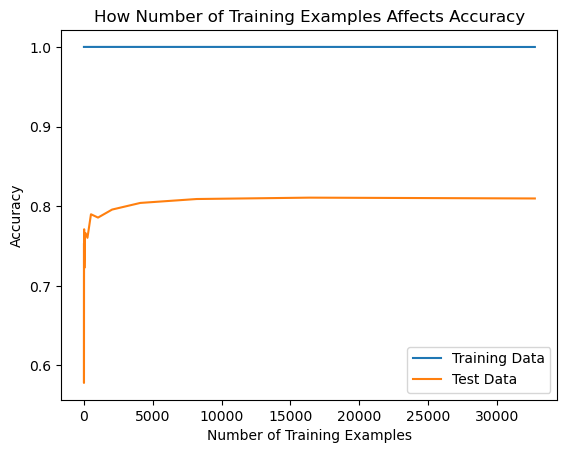

In [96]:
import matplotlib.pyplot as plt
plt.ylabel("Accuracy")
plt.xlabel("Number of Training Examples")
plt.plot(sizes, training_scores, label = "Training Data")
plt.plot(sizes, test_scores, label = "Test Data")
plt.legend()
plt.title("How Number of Training Examples Affects Accuracy")

In [74]:
np.random.shuffle(all_data)
data = all_data[:, :104]
result = all_data[:, 104]
training_data_last_index = int(all_data.shape[0] * .8)
training_data = data[:training_data_last_index]
test_data = data[training_data_last_index:]
training_result = result[:training_data_last_index]
test_result = result[training_data_last_index:]


In [78]:
D3 = DecisionTreeClassifier(random_state=0, criterion="entropy").fit(training_data, training_result)
path = D3.cost_complexity_pruning_path(training_data, training_result)
alphas = path.ccp_alphas
training_scores = []
test_scores = []
for alpha in alphas:
    D3 = DecisionTreeClassifier(random_state=0, criterion="entropy", ccp_alpha=alpha).fit(training_data, training_result)
    training_scores.append(D3.score(training_data, training_result))
    test_scores.append(D3.score(test_data, test_result))



Text(0.5, 1.0, 'How Cost Complexity Pruning Alpha Affects Accuracy')

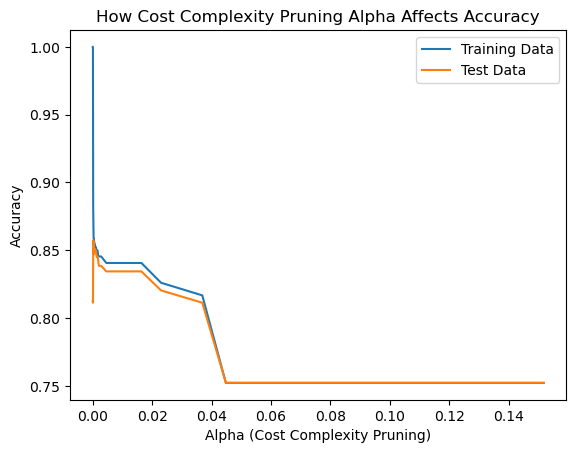

In [84]:
plt.ylabel("Accuracy")
plt.xlabel("Alpha (Cost Complexity Pruning)")
plt.plot(alphas, training_scores, label = "Training Data")
plt.plot(alphas, test_scores, label = "Test Data")
plt.legend()
plt.title("How Cost Complexity Pruning Alpha Affects Accuracy")

[0.00097321 0.00104186 0.00104255 0.00108722 0.001106   0.00111845
 0.00112772 0.00126901 0.00158994 0.00177798 0.0019239  0.00208183
 0.00257489 0.00281079 0.00281598 0.00454105 0.00501908 0.0053611
 0.00547617 0.00575889 0.00887745 0.01149873 0.01635509 0.02297673
 0.03685181 0.04479706 0.15181983] [0.8493090105030403, 0.8493090105030403, 0.8493090105030403, 0.8493090105030403, 0.8476506357103372, 0.8476506357103372, 0.8476506357103372, 0.8452183526810393, 0.8452183526810393, 0.8431177446102819, 0.8401326699834163, 0.8384742951907131, 0.8384742951907131, 0.8384742951907131, 0.8384742951907131, 0.834383637368712, 0.834383637368712, 0.834383637368712, 0.834383637368712, 0.834383637368712, 0.834383637368712, 0.834383637368712, 0.834383637368712, 0.820342730790492, 0.8112769485903815, 0.7522388059701492, 0.7522388059701492]
